<a href="https://colab.research.google.com/github/Yesh1431/CAPSTONE-DS-670-Open_Banking_Safety_and_Fraud_Mitigation_banking/blob/main/Open_Banking_Safety_and_Fraud_Mitigation_Vishant_Yeshwanth_Chirudeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This code pertains to model development of **['Open Banking Safety and Fraud mitigation'](https://)** Capstone Project By Vishant, Chirudeep, Yeshwanth Under guidance o Professor Reda Mastouri

In [1]:
!pip install -U imbalanced-learn smote-variants


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# Load your CSV file

df = pd.read_csv('/content/drive/MyDrive/capstone datasets/Capstone project/Open banking and fraud mitigation.csv')

In [4]:
df.head()

,Reference Number,Control-Number,Financial-Institution-Number,Deposit-Business-Date,Financial-Institution-Business-Date,Financial-Institution-Transaction-Date-Date,Financial-Institution-Transaction-Type-Code-,Financial-Institution-Transaction-Amount,Authorization-Number
0,39909909,2.020000e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,41317.17,100030
1,39909910,2.020000e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,2200.00,611053
2,39909911,2.020000e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,100.00,611057
3,39909912,2.020000e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,500.00,611064
4,39909913,2.020000e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,640.00,1420428


In [5]:
df.describe()

,Reference Number,Control-Number,Financial-Institution-Number,Financial-Institution-Transaction-Amount
count,7.885260e+05,7.763690e+05,788526.000000,7.885260e+05
mean,4.040444e+07,2.020000e+14,206.266396,6.044411e+04
std,2.795631e+05,6.250004e-02,350.931138,2.401311e+07
min,3.990991e+07,2.020000e+14,1.000000,-1.519782e+09
25%,4.016620e+07,2.020000e+14,3.000000,1.600000e+02
50%,4.040466e+07,2.020000e+14,3.000000,8.910700e+02
75%,4.064464e+07,2.020000e+14,241.000000,9.894552e+03
max,4.089023e+07,2.020000e+14,899.000000,1.000000e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788526 entries, 0 to 788525
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0    Reference Number                             788526 non-null  int64  
 1   Control-Number                                776369 non-null  float64
 2   Financial-Institution-Number                  788526 non-null  int64  
 3   Deposit-Business-Date                         788526 non-null  object 
 4   Financial-Institution-Business-Date           788526 non-null  object 
 5   Financial-Institution-Transaction-Date-Date   788526 non-null  object 
 6   Financial-Institution-Transaction-Type-Code-  788526 non-null  object 
 7   Financial-Institution-Transaction-Amount      788526 non-null  float64
 8   Authorization-Number                          787439 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the summary of missing values
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
 Reference Number                                   0
Control-Number                                  12157
Financial-Institution-Number                        0
Deposit-Business-Date                               0
Financial-Institution-Business-Date                 0
Financial-Institution-Transaction-Date-Date         0
Financial-Institution-Transaction-Type-Code-        0
Financial-Institution-Transaction-Amount            0
Authorization-Number                             1087
dtype: int64


In [8]:
# Impute missing values
df['Control-Number'].fillna(df['Control-Number'].mean(), inplace=True)
df['Authorization-Number'].fillna(method='ffill', inplace=True)

# Check if there are still any missing values
missing_values_after_imputation = df.isnull().sum()

# Display the summary of missing values after imputation
print("Missing Values Summary After Imputation:")
print(missing_values_after_imputation)

Missing Values Summary After Imputation:
 Reference Number                               0
Control-Number                                  0
Financial-Institution-Number                    0
Deposit-Business-Date                           0
Financial-Institution-Business-Date             0
Financial-Institution-Transaction-Date-Date     0
Financial-Institution-Transaction-Type-Code-    0
Financial-Institution-Transaction-Amount        0
Authorization-Number                            0
dtype: int64


In [9]:
# Summary statistics for numerical columns
print(df.describe())


        Reference Number  Control-Number  Financial-Institution-Number  \
count       7.885260e+05    7.885260e+05                 788526.000000   
mean        4.040444e+07    2.020000e+14                    206.266396   
std         2.795631e+05    3.125002e-02                    350.931138   
min         3.990991e+07    2.020000e+14                      1.000000   
25%         4.016620e+07    2.020000e+14                      3.000000   
50%         4.040466e+07    2.020000e+14                      3.000000   
75%         4.064464e+07    2.020000e+14                    241.000000   
max         4.089023e+07    2.020000e+14                    899.000000   

       Financial-Institution-Transaction-Amount  
count                              7.885260e+05  
mean                               6.044411e+04  
std                                2.401311e+07  
min                               -1.519782e+09  
25%                                1.600000e+02  
50%                              

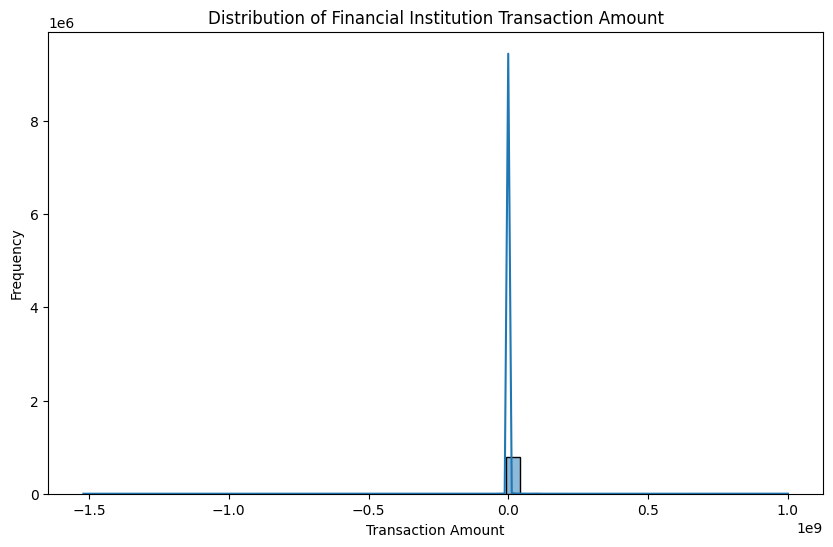

In [10]:
# Plot histogram of Financial-Institution-Transaction-Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Financial-Institution-Transaction-Amount'], bins=50, kde=True)
plt.title('Distribution of Financial Institution Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

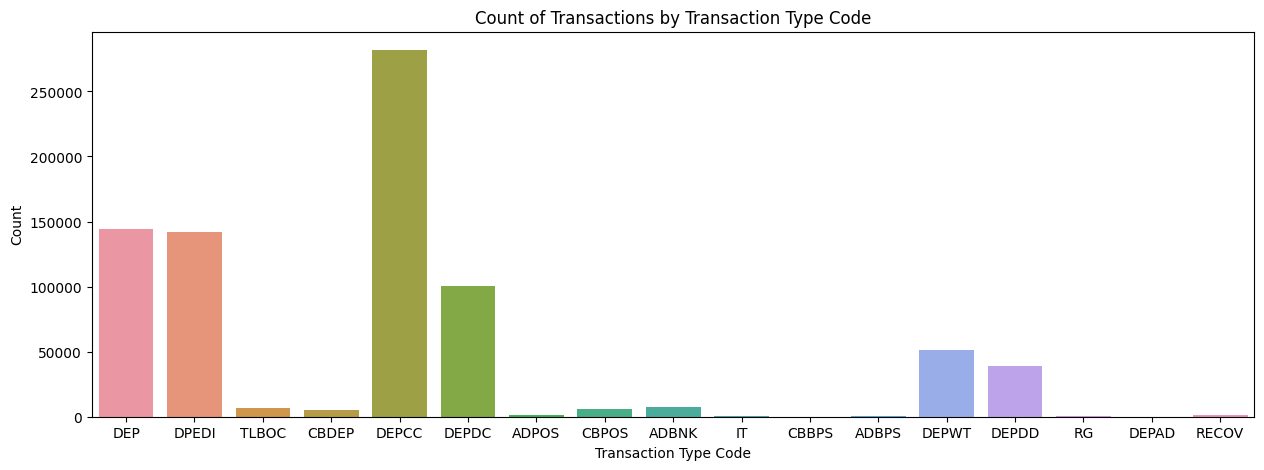

In [11]:
# Plot a bar chart of Financial-Institution-Transaction-Type-Code
plt.figure(figsize=(15, 5))
sns.countplot(x='Financial-Institution-Transaction-Type-Code-', data=df)
plt.title('Count of Transactions by Transaction Type Code')
plt.xlabel('Transaction Type Code')
plt.ylabel('Count')
plt.show()

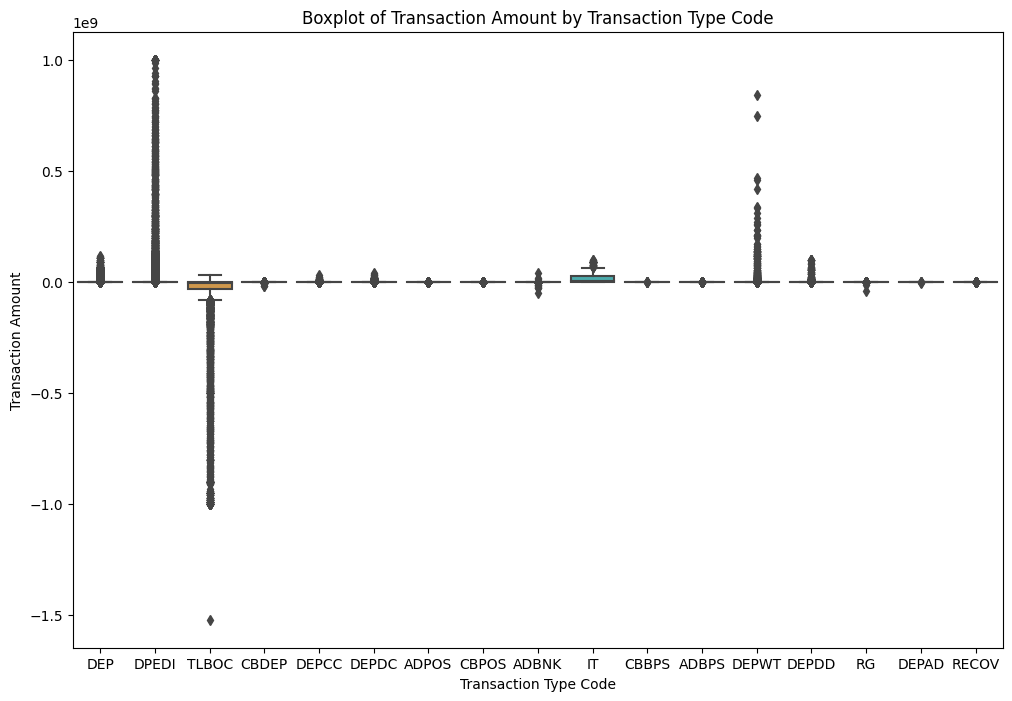

In [12]:
# Boxplot of Financial-Institution-Transaction-Amount by Transaction Type Code
plt.figure(figsize=(12, 8))
sns.boxplot(x='Financial-Institution-Transaction-Type-Code-', y='Financial-Institution-Transaction-Amount', data=df)
plt.title('Boxplot of Transaction Amount by Transaction Type Code')
plt.xlabel('Transaction Type Code')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-13-8d8f636074f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


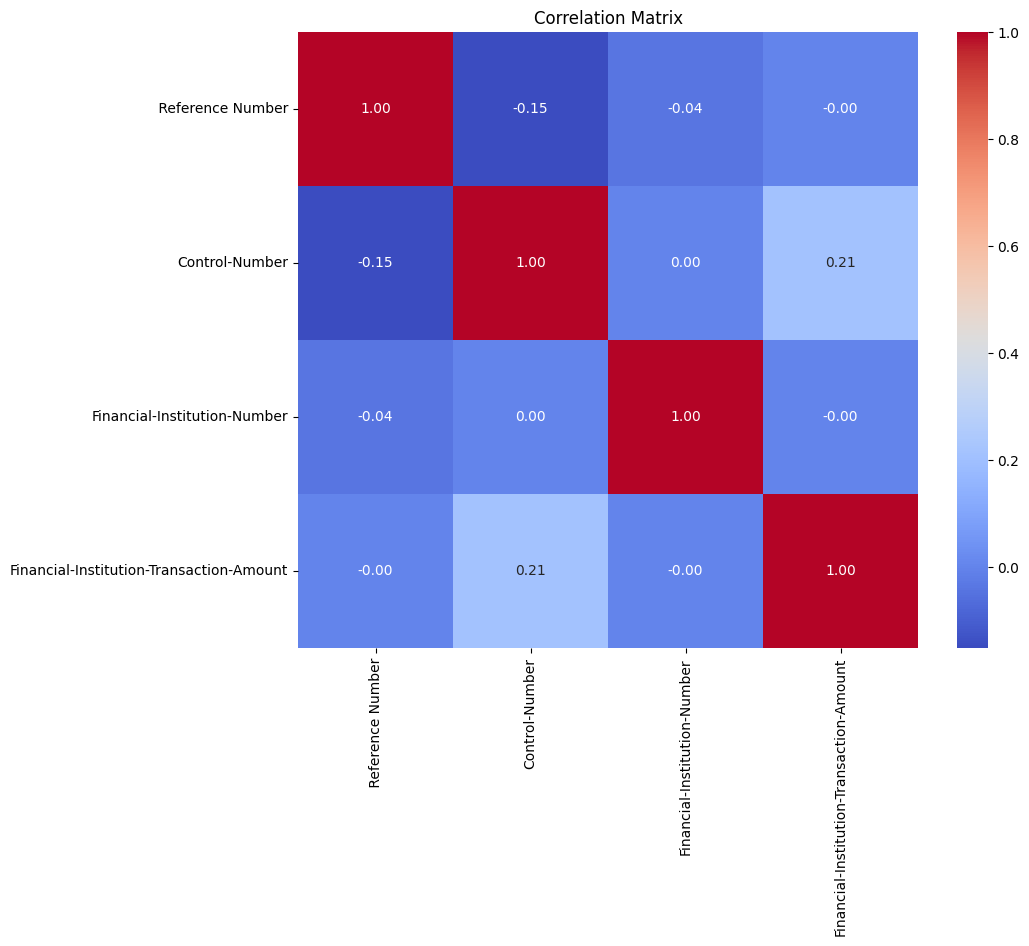

In [13]:
# Heatmap of correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

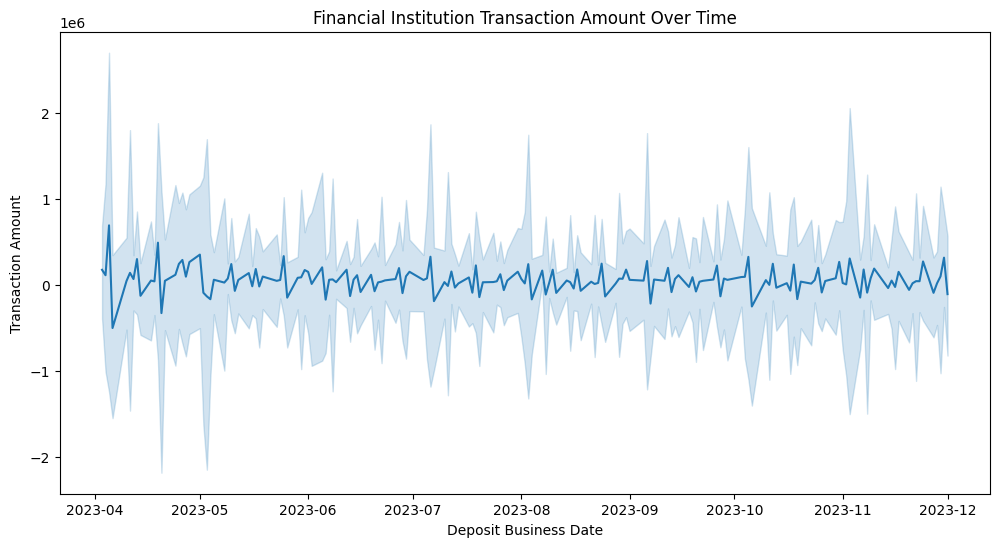

In [14]:
# Convert 'Deposit-Business-Date' to datetime format
df['Deposit-Business-Date'] = pd.to_datetime(df['Deposit-Business-Date'])

# Line plot of Financial-Institution-Transaction-Amount over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Deposit-Business-Date', y='Financial-Institution-Transaction-Amount', data=df)
plt.title('Financial Institution Transaction Amount Over Time')
plt.xlabel('Deposit Business Date')
plt.ylabel('Transaction Amount')
plt.show()

In [15]:
# @title Adding fraud column as a new feature randomly
# Add 'Transaction-Amount-Deviation' column
df['Transaction-Amount-Deviation'] = 0  # Assuming an initial value of 0 for non-fraudulent transactions

# Assuming df is your DataFrame with the provided columns
fraud_percentage = 5

# Step 1: Randomly mark transactions as fraudulent
df['Fraud'] = np.random.choice([0, 1], size=len(df), p=[1 - fraud_percentage/100, fraud_percentage/100])

# Step 2: Optionally, introduce variations for fraudulent transactions
fraudulent_indices = df[df['Fraud'] == 1].index
df.loc[fraudulent_indices, 'Transaction-Amount-Deviation'] += 100  # Increase transaction amount for fraud

# Save the modified DataFrame to a new CSV file
output_file_path = 'synthetic_data_with_fraud.csv'
df.to_csv(output_file_path, index=False)

print(f"\nSynthetic data with fraud generated and saved to {output_file_path}.")


Synthetic data with fraud generated and saved to synthetic_data_with_fraud.csv.


In [16]:
import pandas as pd

# Load the synthetic data with fraud
file_path = 'synthetic_data_with_fraud.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788526 entries, 0 to 788525
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0    Reference Number                             788526 non-null  int64  
 1   Control-Number                                788526 non-null  float64
 2   Financial-Institution-Number                  788526 non-null  int64  
 3   Deposit-Business-Date                         788526 non-null  object 
 4   Financial-Institution-Business-Date           788526 non-null  object 
 5   Financial-Institution-Transaction-Date-Date   788526 non-null  object 
 6   Financial-Institution-Transaction-Type-Code-  788526 non-null  object 
 7   Financial-Institution-Transaction-Amount      788526 non-null  float64
 8   Authorization-Number                          788526 non-null  object 
 9   Transaction-Amount-Deviation                  78

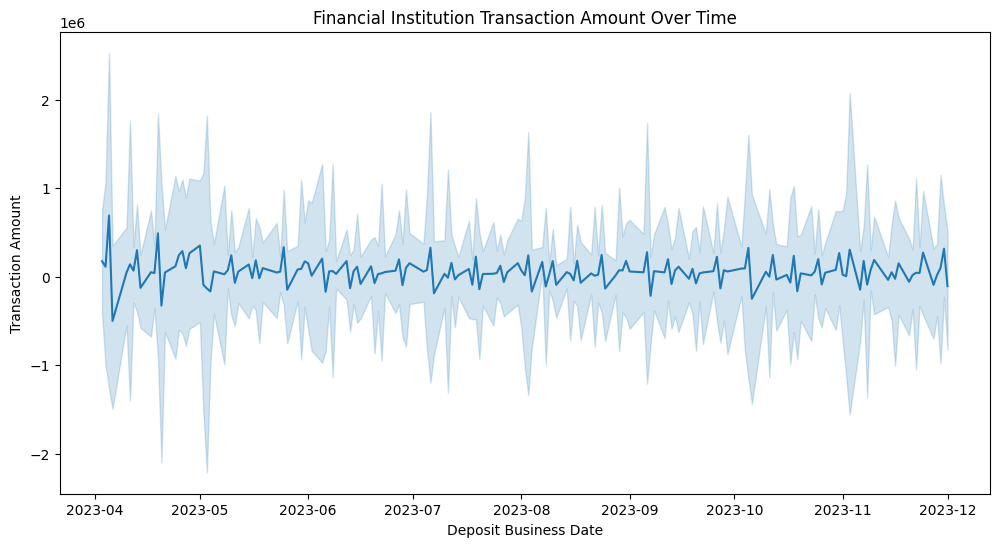

In [17]:
# Convert 'Deposit-Business-Date' to datetime format
df['Deposit-Business-Date'] = pd.to_datetime(df['Deposit-Business-Date'])

# Line plot of Financial-Institution-Transaction-Amount over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Deposit-Business-Date', y='Financial-Institution-Transaction-Amount', data=df)
plt.title('Financial Institution Transaction Amount Over Time')
plt.xlabel('Deposit Business Date')
plt.ylabel('Transaction Amount')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn.over_sampling import SMOTE

In [19]:
# Load the synthetic data with fraud
file_path = 'synthetic_data_with_fraud.csv'
df = pd.read_csv(file_path)

In [20]:
# Extract relevant information from date columns
df['Deposit-Business-Date'] = pd.to_datetime(df['Deposit-Business-Date'])
df['Transaction-Day'] = df['Deposit-Business-Date'].dt.day
df['Transaction-Month'] = df['Deposit-Business-Date'].dt.month
df['Transaction-Year'] = df['Deposit-Business-Date'].dt.year

In [21]:
# Drop the original date columns
df = df.drop(['Deposit-Business-Date'], axis=1)

In [22]:
# Split the data into features (X) and target variable (y)
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#preprocessing steps
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [25]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42)

In [27]:
# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', random_forest_model)])

In [28]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([' Reference Number', 'Control-Number', 'Financial-Institution-Number',
       'Financial-Institution-Transaction-Amount',
       'Transaction-Amount-Deviation', 'Transaction-Day', 'Transaction-Month',
       'Transaction-Year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Financial-Institution-Business-Date',
       'Financial-Institution-Transaction-Date-Date',
       'Financial-Institution-Transaction-Type-Code-', 'Authorization-Number'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [29]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [30]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [31]:
# Print results
print(f"Results for Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Results for Random Forest:
Accuracy: 1.0000
Confusion Matrix:
[[149814      0]
 [     0   7892]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149814
           1       1.00      1.00      1.00      7892

    accuracy                           1.00    157706
   macro avg       1.00      1.00      1.00    157706
weighted avg       1.00      1.00      1.00    157706



In [32]:
# Check class distribution
class_distribution = df['Fraud'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    748764
1     39762
Name: Fraud, dtype: int64


In [33]:
# Load the synthetic data with fraud
file_path = 'synthetic_data_with_fraud.csv'
df = pd.read_csv(file_path)


In [34]:
# Convert date columns to datetime
date_columns = ['Deposit-Business-Date', 'Financial-Institution-Business-Date', 'Financial-Institution-Transaction-Date-Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract relevant information from date columns
df['Transaction-Day'] = df['Deposit-Business-Date'].dt.day
df['Transaction-Month'] = df['Deposit-Business-Date'].dt.month
df['Transaction-Year'] = df['Deposit-Business-Date'].dt.year

# Drop the original date columns
df = df.drop(date_columns, axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [35]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps
numeric_features = X.select_dtypes(include=['number']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

In [36]:
X_train.head()

,Reference Number,Control-Number,Financial-Institution-Number,Financial-Institution-Transaction-Amount,Transaction-Amount-Deviation,Transaction-Day,Transaction-Month,Transaction-Year,Financial-Institution-Transaction-Type-Code-_ADBPS,Financial-Institution-Transaction-Type-Code-_ADPOS,...,Authorization-Number_99199990,Authorization-Number_99199991,Authorization-Number_999999,Authorization-Number_9999999,Authorization-Number_99999999,Authorization-Number_ECRITURE,Authorization-Number_GOVRCRA,Authorization-Number_GOVTCRA,Authorization-Number_GOVTEFT,Authorization-Number_RENV-E
392797,40403176,2.020000e+14,3,47965.00,0,31,7,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
609949,40667938,2.020000e+14,3,70.30,0,3,10,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
242499,40222768,2.020000e+14,3,70188068.79,0,20,6,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
273278,40258723,2.020000e+14,815,43645.00,0,28,6,2023,0,0,...,0,0,0,0,0,0,0,0,0,0
39408,39962444,2.020000e+14,3,44.25,0,17,4,2023,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Specify the features you want to include in the subset
selected_features = [' Reference Number', 'Control-Number', 'Financial-Institution-Number',
       'Financial-Institution-Transaction-Amount',
       'Transaction-Amount-Deviation', 'Transaction-Day', 'Transaction-Month',
       'Transaction-Year',
       'Financial-Institution-Transaction-Type-Code-_ADBPS',
       'Financial-Institution-Transaction-Type-Code-_ADPOS','Authorization-Number_99199990', 'Authorization-Number_99199991',
       'Authorization-Number_999999', 'Authorization-Number_9999999',
       'Authorization-Number_99999999', 'Authorization-Number_ECRITURE',
       'Authorization-Number_GOVRCRA', 'Authorization-Number_GOVTCRA',
       'Authorization-Number_GOVTEFT', 'Authorization-Number_RENV-E']

# Select a subset of features from the original training data
X_train_subset = X_train[selected_features]

In [38]:
# Print the column names of X_train
print(X_train.columns)


Index([' Reference Number', 'Control-Number', 'Financial-Institution-Number',
       'Financial-Institution-Transaction-Amount',
       'Transaction-Amount-Deviation', 'Transaction-Day', 'Transaction-Month',
       'Transaction-Year',
       'Financial-Institution-Transaction-Type-Code-_ADBPS',
       'Financial-Institution-Transaction-Type-Code-_ADPOS',
       ...
       'Authorization-Number_99199990', 'Authorization-Number_99199991',
       'Authorization-Number_999999', 'Authorization-Number_9999999',
       'Authorization-Number_99999999', 'Authorization-Number_ECRITURE',
       'Authorization-Number_GOVRCRA', 'Authorization-Number_GOVTCRA',
       'Authorization-Number_GOVTEFT', 'Authorization-Number_RENV-E'],
      dtype='object', length=2998)


In [39]:
# Apply SMOTE to the subset of features
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
random_forest_model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

In [41]:
# Convert categorical features to numerical using one-hot encoding for test data
X_test_subset = pd.get_dummies(X_test[selected_features], drop_first=True)


In [42]:
# Ensure feature order
X_test_subset = X_test_subset[selected_features]


In [43]:
# Make predictions on the test data
y_pred = random_forest_model.predict(X_test_subset)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0
Confusion Matrix:
[[149814      0]
 [     0   7892]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149814
           1       1.00      1.00      1.00      7892

    accuracy                           1.00    157706
   macro avg       1.00      1.00      1.00    157706
weighted avg       1.00      1.00      1.00    157706



In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_logistic = logistic_regression_model.predict(X_test_subset)


In [46]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_subset)


In [47]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
neural_network_model = MLPClassifier(random_state=42)

# Train the model
neural_network_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_nn = neural_network_model.predict(X_test_subset)


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to evaluate a model and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Confusion Matrix and Classification Report
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, zero_division=0)

    # Print metrics
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_mat)
    print("\nClassification Report:")
    print(classification_rep)
    print("\n" + "-"*50)

# Evaluate Logistic Regression Model
evaluate_model(logistic_regression_model, X_test_subset, y_test, "Logistic Regression")

# Evaluate Random Forest Model within Ensemble
evaluate_model(random_forest_model, X_test_subset, y_test, "Random Forest within Ensemble")

# Evaluate XGBoost Model within Ensemble
evaluate_model(xgb_model, X_test_subset, y_test, "XGBoost within Ensemble")

# Evaluate Neural Network Model
evaluate_model(neural_network_model, X_test_subset, y_test, "Neural Network")




Logistic Regression Model:
Accuracy: 0.9073
Precision: 0.0475
Recall: 0.0447
F1 Score: 0.0461

Confusion Matrix:
[[142736   7078]
 [  7539    353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    149814
           1       0.05      0.04      0.05      7892

    accuracy                           0.91    157706
   macro avg       0.50      0.50      0.50    157706
weighted avg       0.90      0.91      0.91    157706


--------------------------------------------------
Random Forest within Ensemble Model:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[149814      0]
 [     0   7892]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149814
           1       1.00      1.00      1.00      7892

    accuracy                           1.00    157706
   macro avg       1.00      1.00      1.00    15

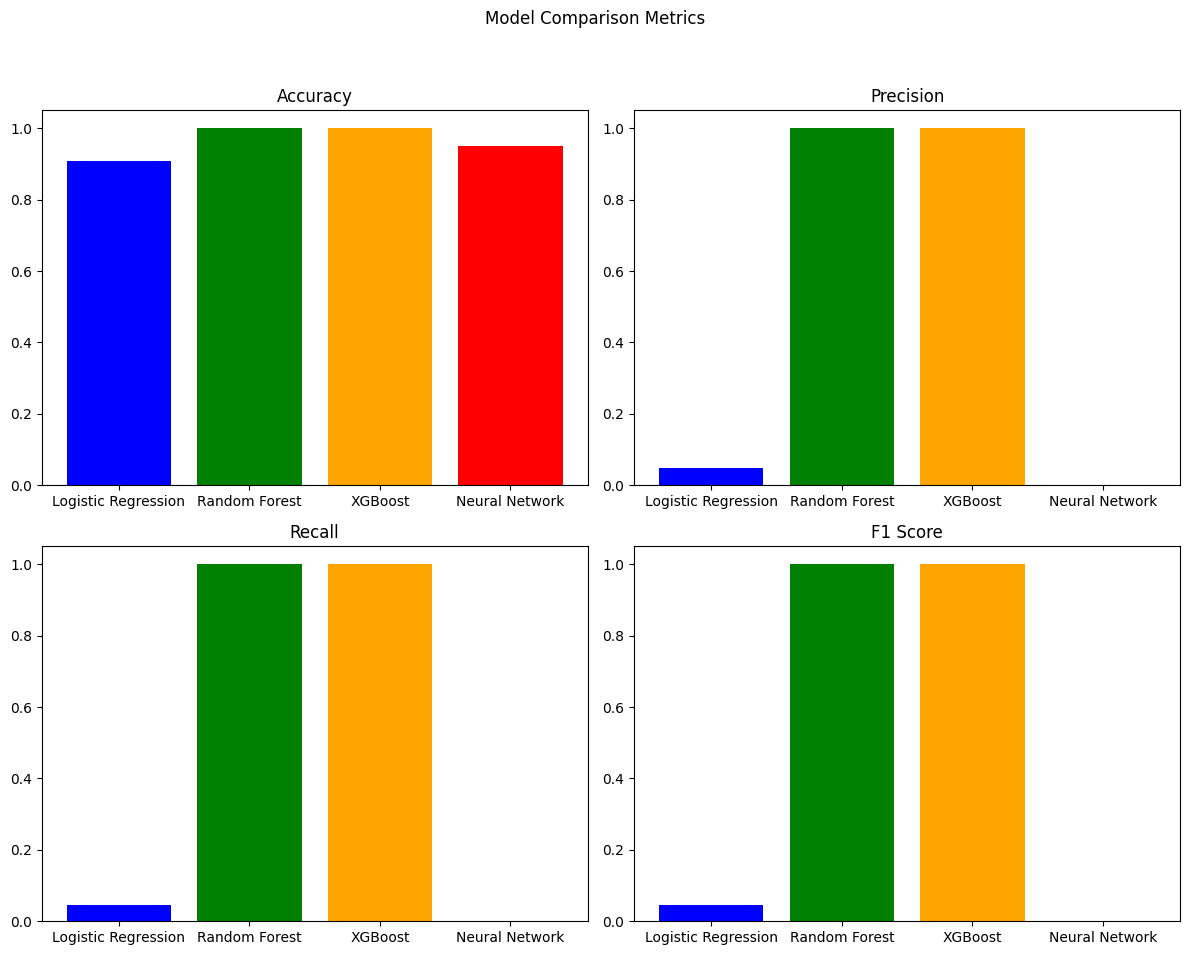

In [52]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']
accuracy = [0.9073, 1.0000, 1.0000, 0.9500]
precision = [0.0475, 1.0000, 1.0000, 0.0000]
recall = [0.0447, 1.0000, 1.0000, 0.0000]
f1_score = [0.0461, 1.0000, 1.0000, 0.0000]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Model Comparison Metrics')

# Accuracy
axes[0, 0].bar(models, accuracy, color=['blue', 'green', 'orange', 'red'])
axes[0, 0].set_title('Accuracy')

# Precision
axes[0, 1].bar(models, precision, color=['blue', 'green', 'orange', 'red'])
axes[0, 1].set_title('Precision')

# Recall
axes[1, 0].bar(models, recall, color=['blue', 'green', 'orange', 'red'])
axes[1, 0].set_title('Recall')

# F1 Score
axes[1, 1].bar(models, f1_score, color=['blue', 'green', 'orange', 'red'])
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()
